In [2]:
#Author: Zoheen Shahzad
#oCR model


import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt 

images = []
labels = []
 
path = 'C:/Users/Zoheen/Downloads/archive/data/training_data'
 
dir_list = os.listdir(path)
for i in dir_list:
  dir = os.path.join(path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    images.append(img)
    labels.append(i)


X = np.array(images)
y = np.array(labels)





In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print(f"shape of training data is: {X.shape}")
print(f"Labels: {y.shape}")

shape of training data is: (20628, 64, 64, 3)
Labels: (20628,)


In [6]:
from sklearn.utils import shuffle
X_sh, y_sh = shuffle(X, y, random_state=42)

In [7]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=36, activation='softmax'))

C:\Users\Zoheen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_sh, y_sh ,validation_split=0.2, batch_size=16, epochs=10)

Epoch 1/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.6255 - loss: 1.3762 - val_accuracy: 0.9258 - val_loss: 0.2729
Epoch 2/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9398 - loss: 0.1933 - val_accuracy: 0.9229 - val_loss: 0.2680
Epoch 3/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9535 - loss: 0.1330 - val_accuracy: 0.9363 - val_loss: 0.2072
Epoch 4/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9636 - loss: 0.0996 - val_accuracy: 0.9510 - val_loss: 0.1905
Epoch 5/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9671 - loss: 0.0911 - val_accuracy: 0.9469 - val_loss: 0.1777
Epoch 6/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9745 - loss: 0.0669 - val_accuracy: 0.9496 - val_loss: 0.1848
Epoch 7/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9728 - loss: 0.0682 - val_accuracy: 0.9464 - val_loss: 0.1962
Epoch 8/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.9774 -

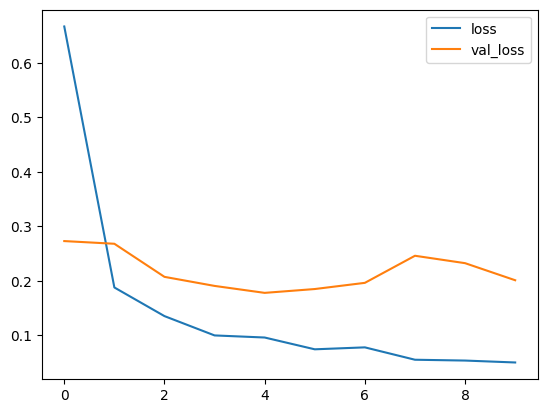

In [10]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

In [14]:
test_images = []
test_labels = []
 
path = 'C:/Users/Zoheen/Downloads/archive/data/testing_data'
 
dir_list = os.listdir(path)
for i in dir_list:
  dir = os.path.join(path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    test_images.append(img)
    test_labels.append(i)

In [15]:
X_test = np.array(test_images)
y_test = np.array(test_labels)
print(f"Shape of testing images: {X_test.shape}")
print(f"Test labels: {y_test.shape}")

Shape of testing images: (1008, 64, 64, 3)
Test labels: (1008,)


In [16]:
preds = model.predict(X_test)
predicted_labels = le.inverse_transform(np.argmax(preds, axis=1))


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


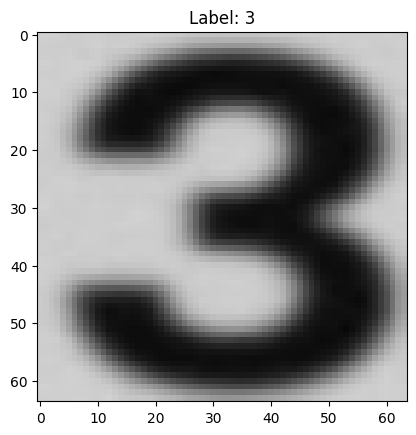

In [20]:
plt.imshow(X_test[100])
plt.title(f"Label: {predicted_labels[100]}")
plt.show()

In [21]:
y_test = le.fit_transform(y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9239 - loss: 0.1487
Test Accuracy: 0.9702380895614624
